# Ejemplo de un análisis completo de una partitura

In [2]:
import music21 as msc
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
from matplotlib import cm
from funciones import *

# No se cual es el path de xml en linux

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Primero
Selección de canción o canciones; análisis rápido de tonalidad, e histogramas de tono y clase de tono. (Puede servir para fijarme por ejemplo si el tono más común es el de la tonalidad)

Norwegian Wood in E major


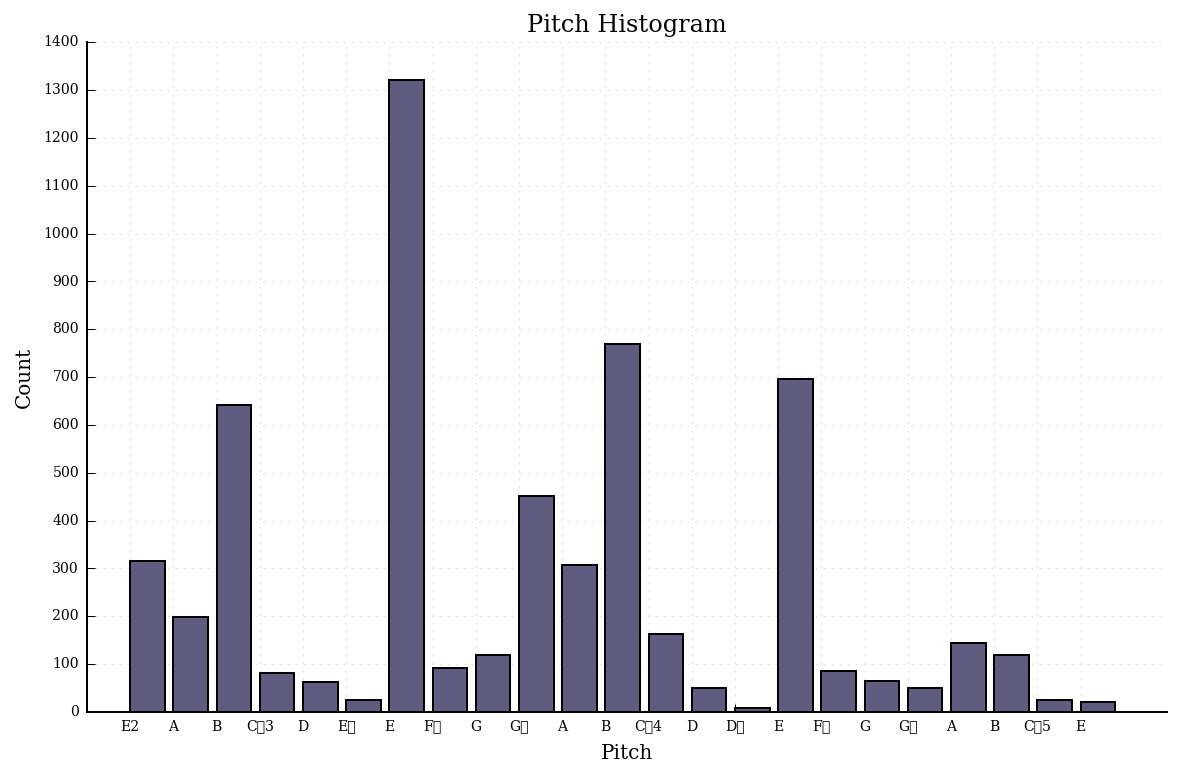

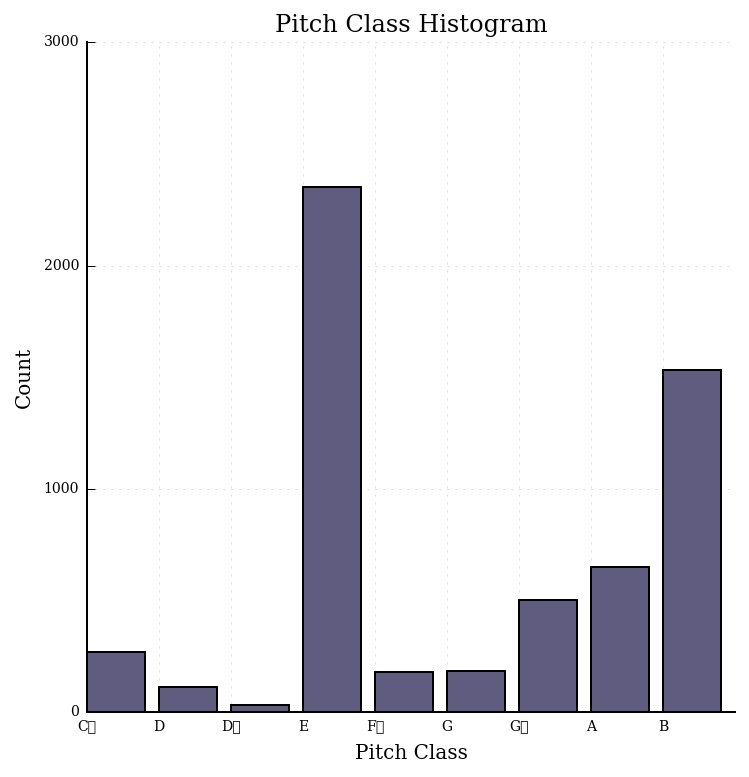

In [39]:
# Elijo la canción, o una lista de canciones
# Puede ser la direccion del archivo o algo del corpus
mydir=os.getcwd()
cancion = r'./partituras/Rock/Beatles/beatles_wood.mxl'
#cancion = msc.corpus.parse('bach/bwv65.2.xml')
#canciones = msc.corpus.search('bach', fileExtensions='xml')

cancion = msc.converter.parse(cancion)
titulo = (cancion.metadata.title).replace(".mxl", "").replace(".xml", "").replace("_"," ")
key = cancion.analyze('key')
print(titulo+' in '+str(key))

# Hago un primer análisis rápido de la canción usando histogramas
cancion.plot('histogram', 'pitch')
cancion.plot('histogram', 'pitchClass')
#cancion.plot('histogram', 'octave')

## Redes
Creación de grafos: de melodía, ritmo y armonía

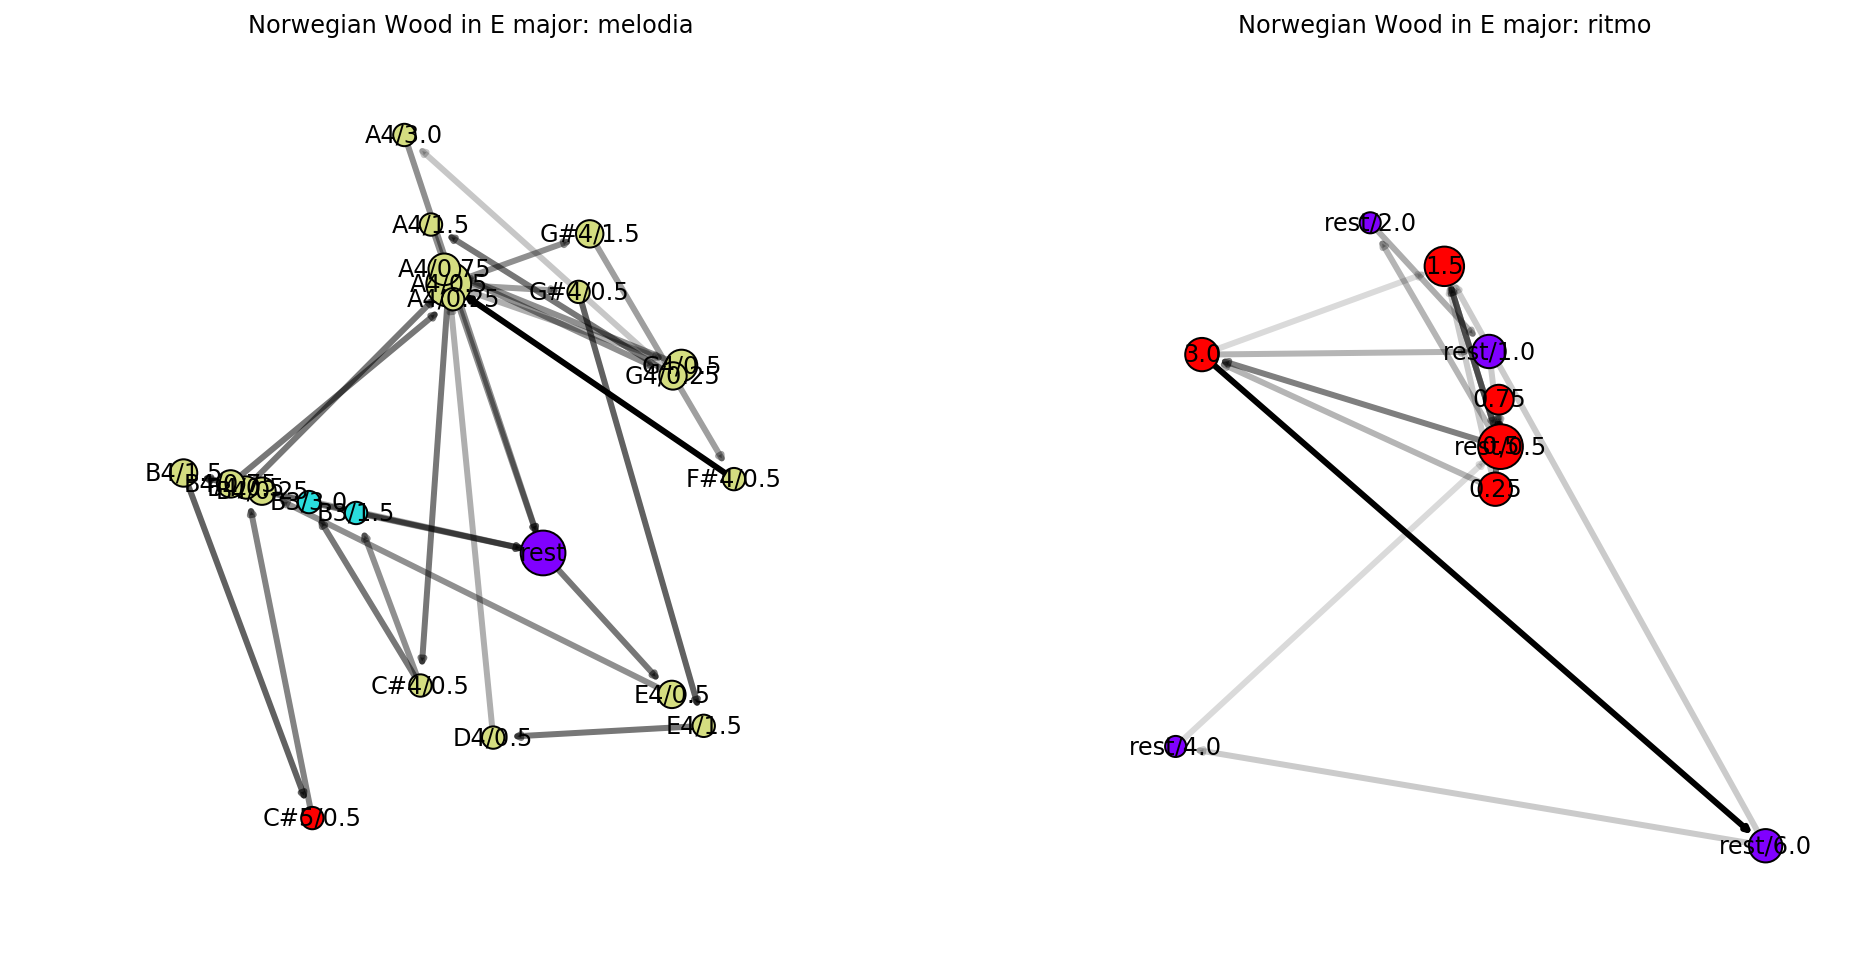

In [36]:
# Creacion de grafos de melodia y ritmo
# Argumentos: #(cancion, nombre_parte=None,modelo='melodia')
G_m = f_xml2graph(cancion)
G_r = f_xml2graph(cancion,modelo='ritmo')

# Graficos de ambos en una unica figura
# Argumentos: (G, color_map='rainbow',layout='espiral', labels=False)
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title(titulo+' in '+str(key)+': melodia')
graficar(G_m,labels=True)
plt.subplot(1, 2, 2)
plt.title(titulo+' in '+str(key)+': ritmo')
graficar(G_r,labels=True)

Instrumento Seleccionado:Piano


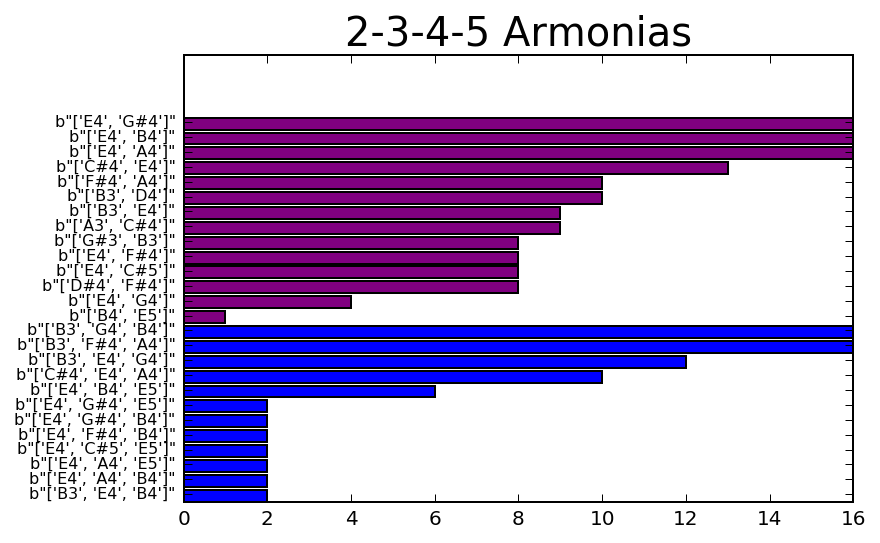

Armonias encontradas y su tiempo de aparicion


In [2]:
# Creación de grafo de la armonia
# Argumentos: cancion,index de voz
cancion = r'./partituras/Rock/Beatles/beatles_wood.mxl'
AU=f_xml2graph_armonia(cancion, 1)[2]

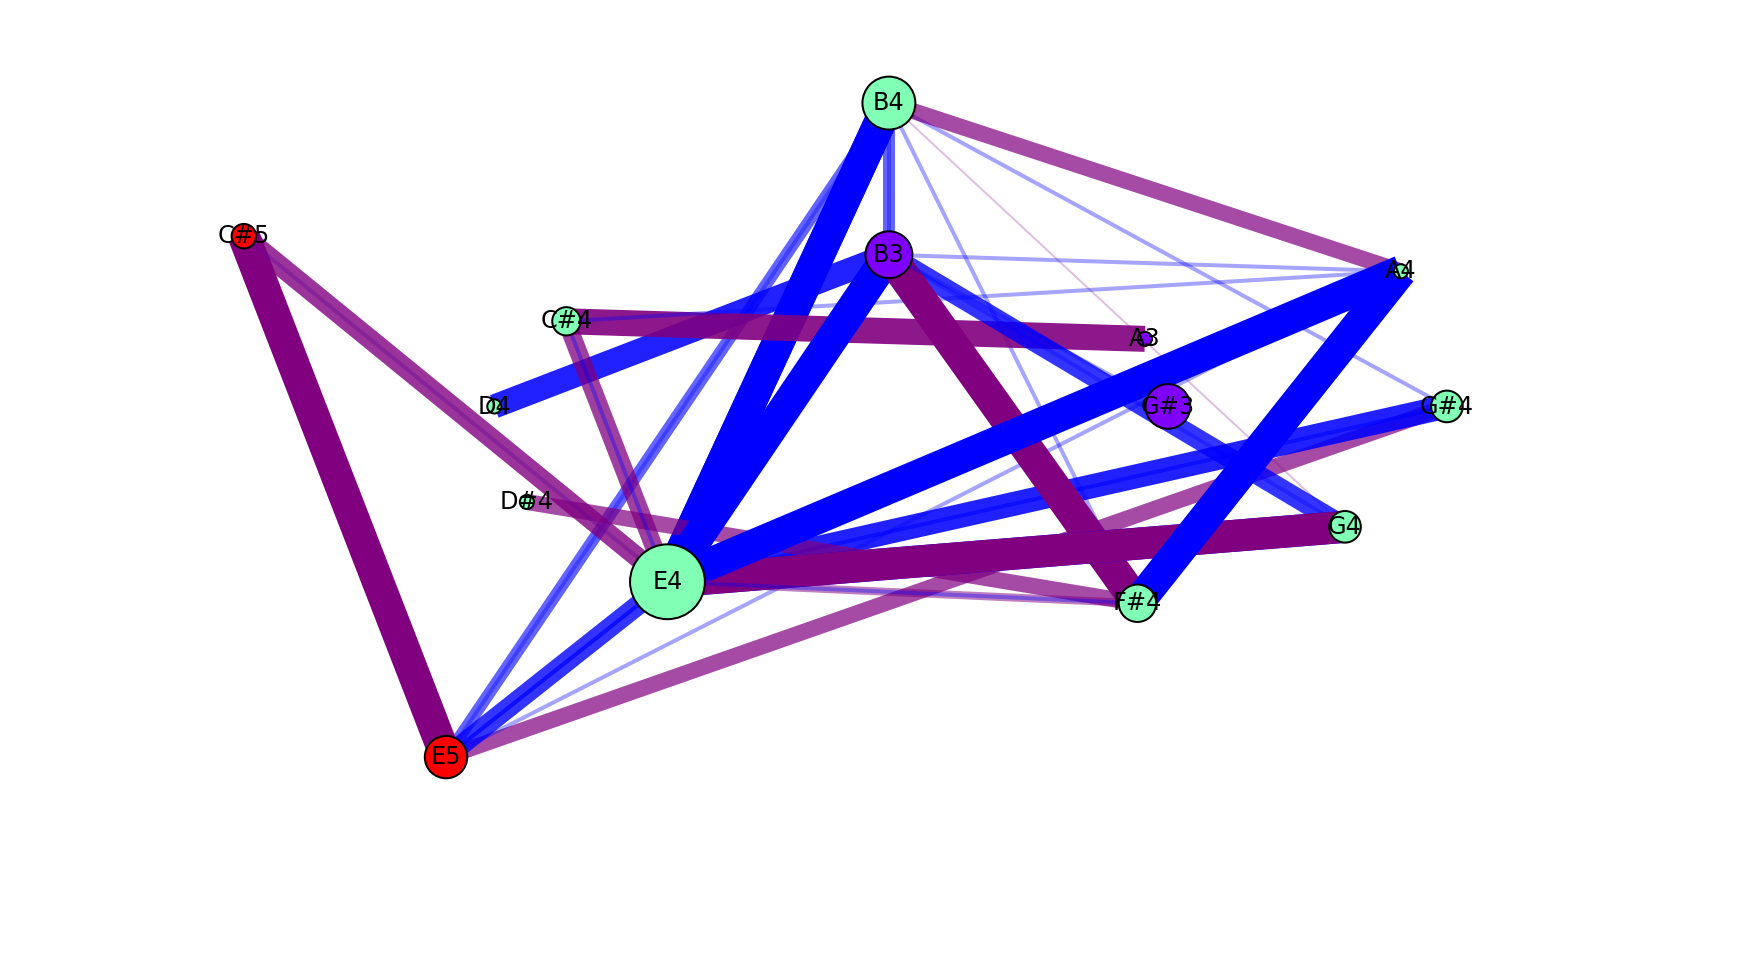

In [5]:
#Grafo de Armonia no dirigida:
plt.figure(figsize=(15,8))
f_graficar_armonias_undirected(AU, color_map='rainbow',layout='espiral',labels=True)
plt.show()

In [7]:
# Para ver el nodo de mayor grado
nodos = list(dict(G_m.degree()).keys())
grados = list(dict(G_m.degree()).values())
indices = [i for i,grado in enumerate(grados) if grado==max(grados)]
for j in indices:
    print('Melodia: '+nodos[j]+' con grado '+str(grados[j]))
    
# No me dice mucho tanto como el histograma "por culpa" de las duraciones
# Hago lo mismo con la armonía
nodos = list(dict(G_a.degree()).keys())
grados = list(dict(G_a.degree()).values())
indices = [i for i,grado in enumerate(grados) if grado==max(grados)]
for j in indices:
    print('Armonia: '+nodos[j]+' con grado '+str(grados[j]))

Melodia: rest con grado 8
Melodia: A4/0.5 con grado 8
Armonia: E3 con grado 7


### Datos de las redes
La función tabla no sirve para la armonía porque usa redes dirigidas

In [9]:
data_m = f_tabla(G_m,titulo+' '+str(key))
data_r = f_tabla(G_r,titulo+' '+str(key))

data_m

,<C_local>,<K>,<K_{in}>,<K_{out}>,<Min Dist>,C_global,Densidad,Diametro,Enlaces,K_{in} max,K_{in} min,K_{out} max,K_{out} min,Nodos,Red
0,0.09026,NaN,1.5,1.5,4.7,0.041667,0.071429,NaN,33,5,1,4,1,22,Norwegian Wood E major


In [10]:
data_r

,<C_local>,<K>,<K_{in}>,<K_{out}>,<Min Dist>,C_global,Densidad,Diametro,Enlaces,K_{in} max,K_{in} min,K_{out} max,K_{out} min,Nodos,Red
0,0.281161,NaN,2.6,2.6,2.38,0.305556,0.288889,NaN,26,5,1,5,1,10,Norwegian Wood E major


## Motifs

Parte seleccionada: Voice
Parte seleccionada: Voice


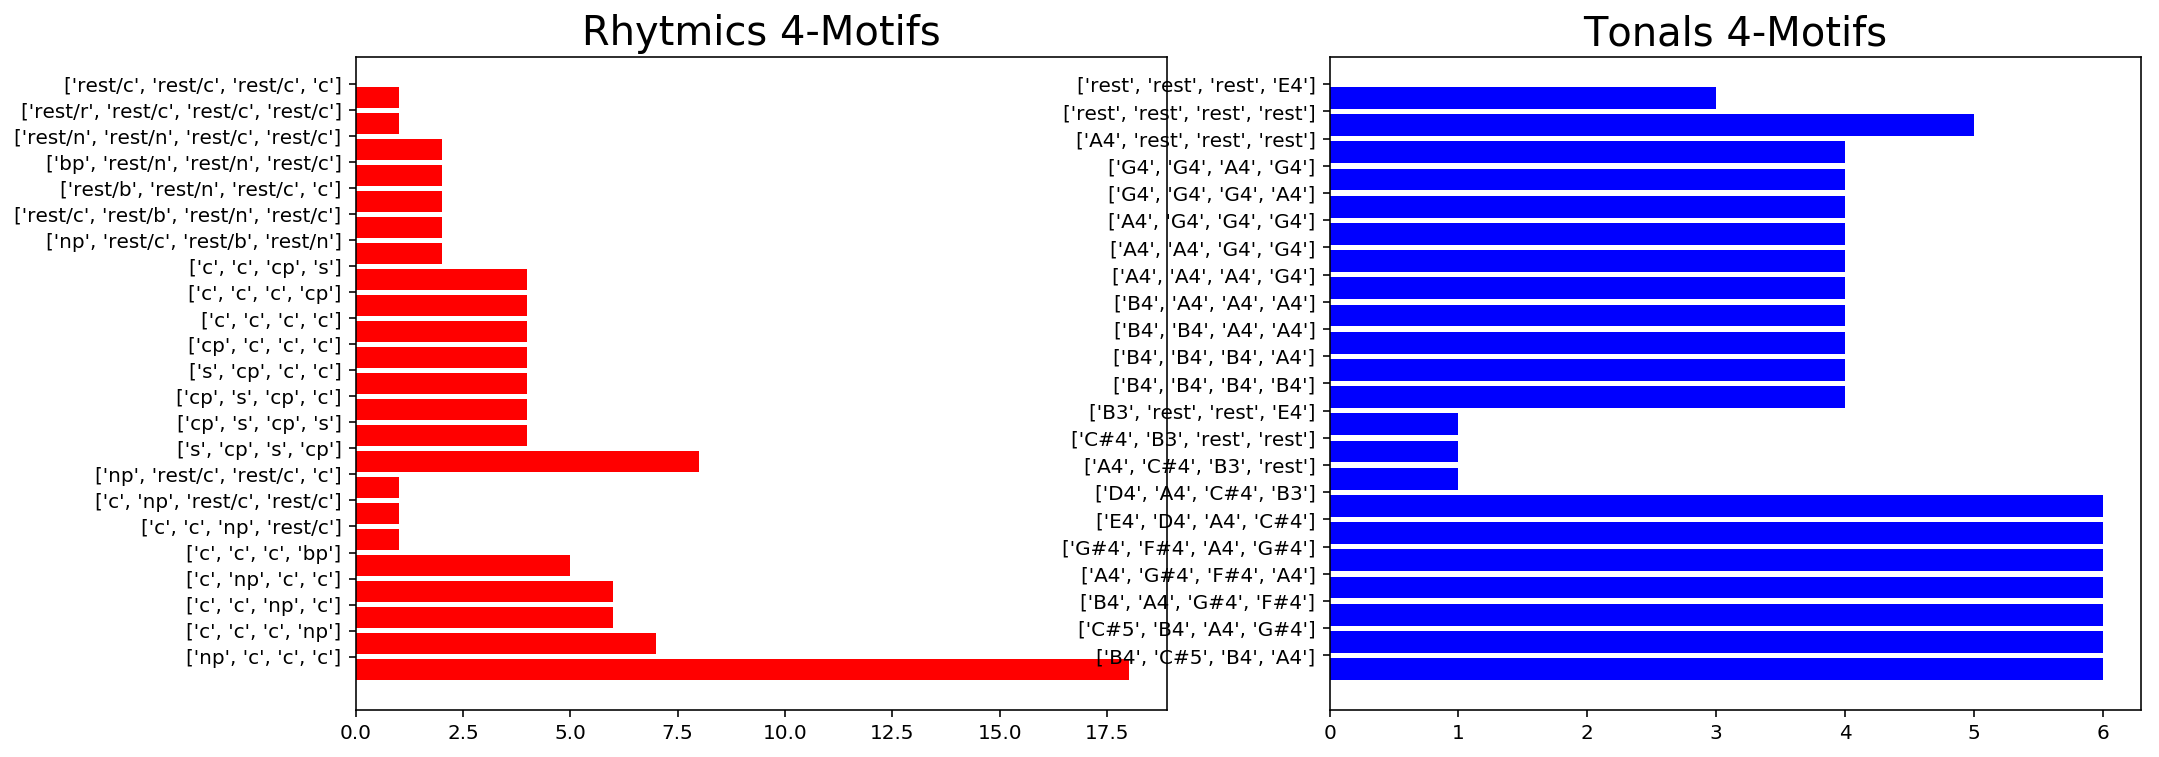

In [13]:
# Motifs ritmicos y tonales
# Argumentos: (cancion,length,nombre_parte=None)
length = 4

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
motivo1, frec1 = f_motifs_rhytmic(cancion,length)
plt.subplot(1, 2, 2)
motivo2, frec2 = f_motifs_tonal(cancion,length)

# Cliques

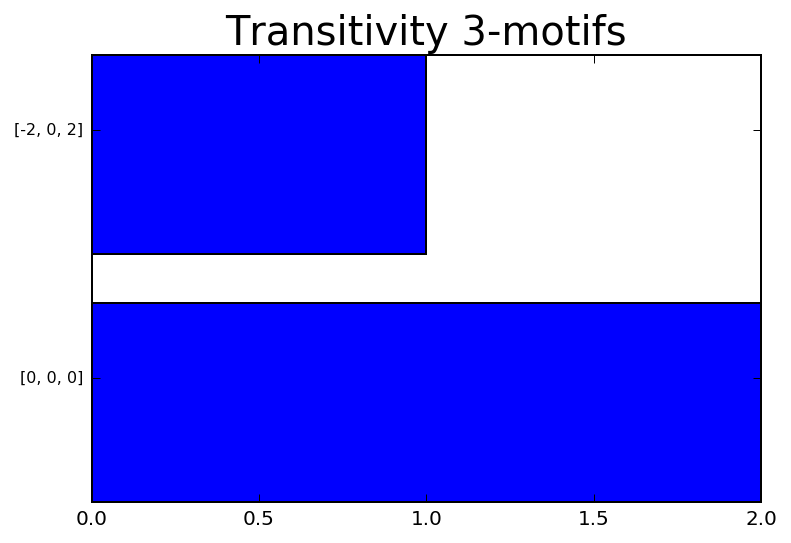

([['A4/0.75', 'G4/0.5', 'A4/0.5'],
  ['B4/1.5', 'rest', 'B3/3.0'],
  ['G#4/1.5', 'F#4/0.5', 'A4/0.5']],
 [['<-', '', '<-', '', '<-', ''],
  ['', '', '<-', '', '<-', '->'],
  ['', '->', '', '->', '', '->']])

In [15]:
G_m = f_xml2graph(cancion,0)
G_r = f_xml2graph(cancion,modelo='ritmo')
f_transitivity_motifs(G_m)

# Armonias entre voces


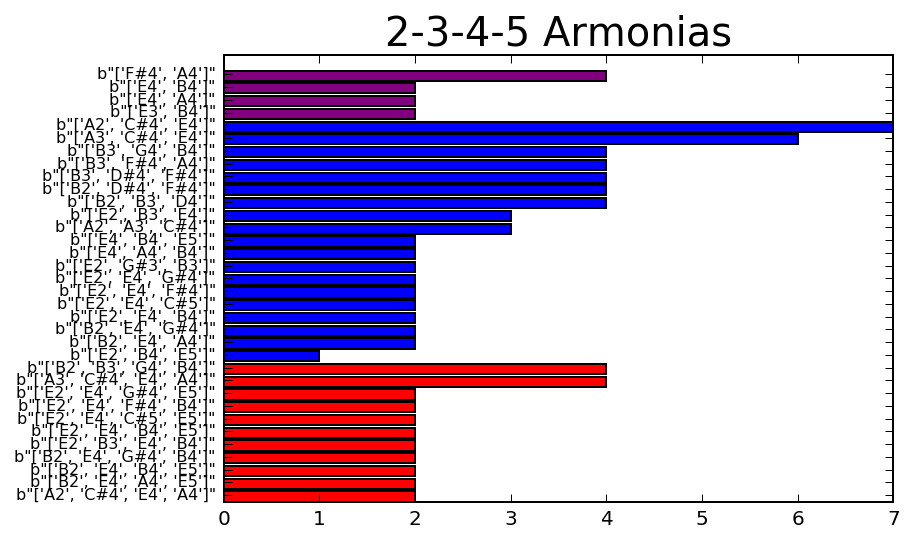

In [2]:
cancion = r'./partituras/Rock/Beatles/beatles_wood.mxl'
AU_voices=f_armon(cancion,[0,1,2])[2]

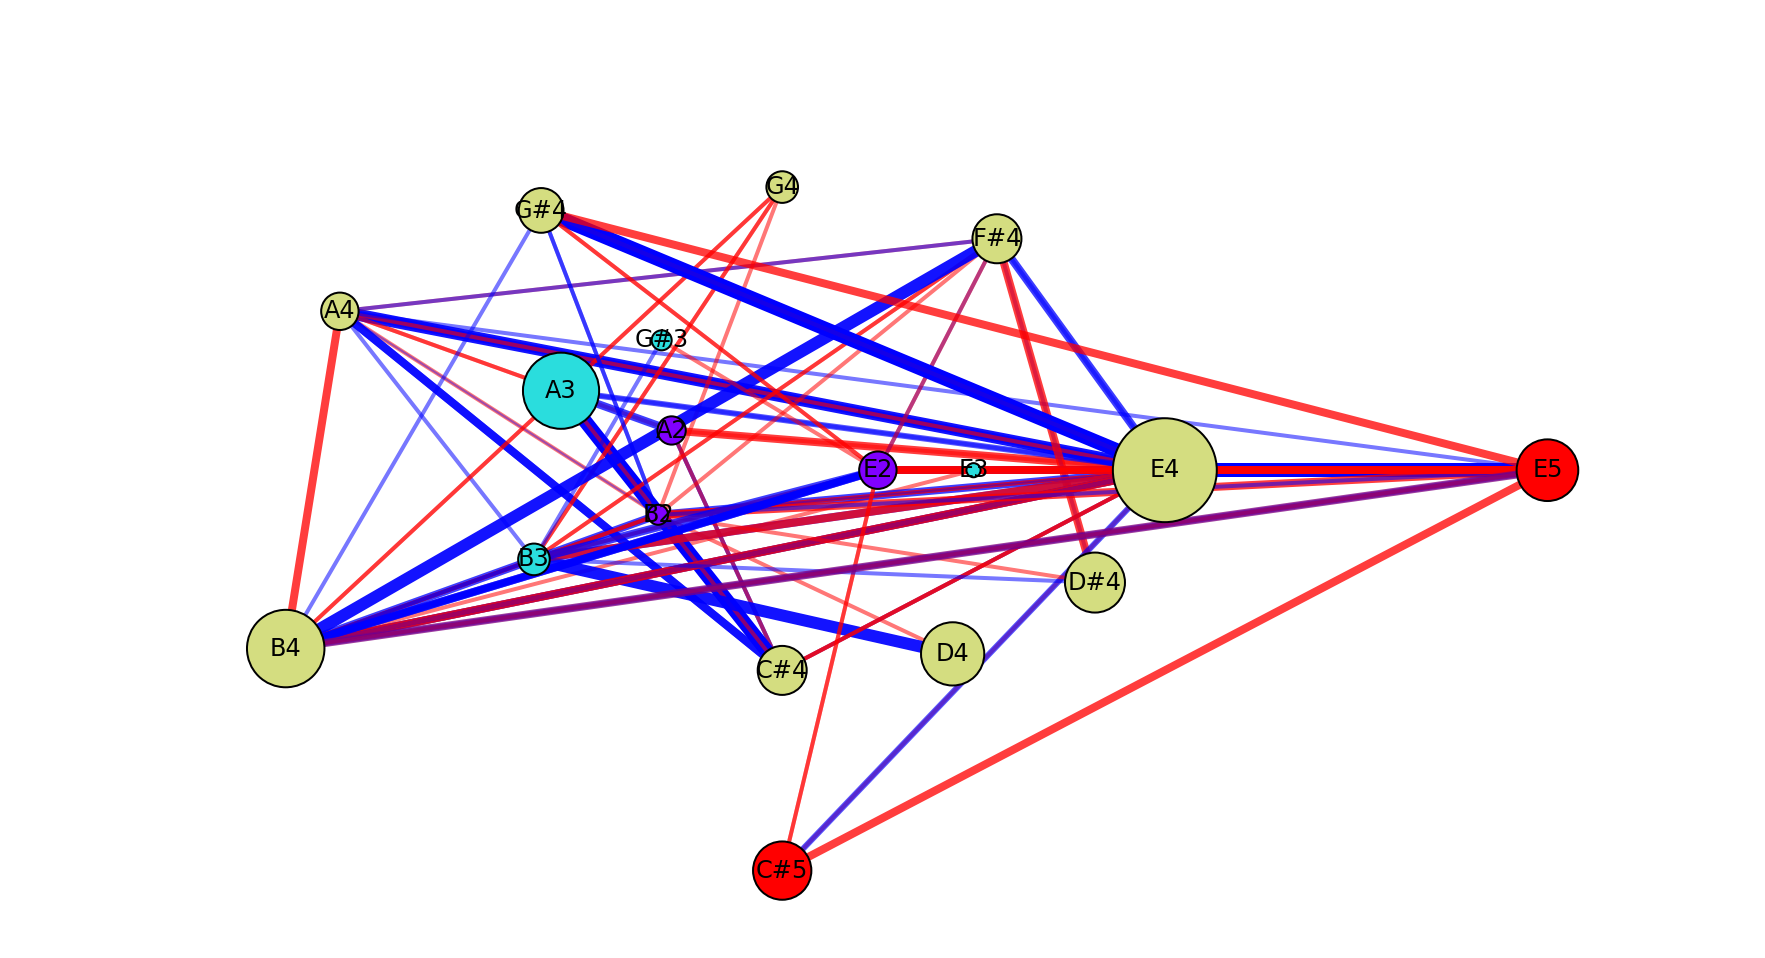

In [3]:
plt.figure(figsize=(15,8))
f_graficar_armonias_undirected(AU_voices, color_map='rainbow',layout='espiral',labels=True)
plt.show()

# Graficos 2d y 3d


Instrumento Seleccionados:['Voice', 'Piano', 'Piano']
Creando inter-enlaces entre las voces:
Instrumento Seleccionados:['Voice', 'Piano']
Creando inter-enlaces entre las voces:
Instrumento Seleccionados:['Voice', 'Piano']
Creando inter-enlaces entre las voces:
Instrumento Seleccionados:['Piano', 'Piano']


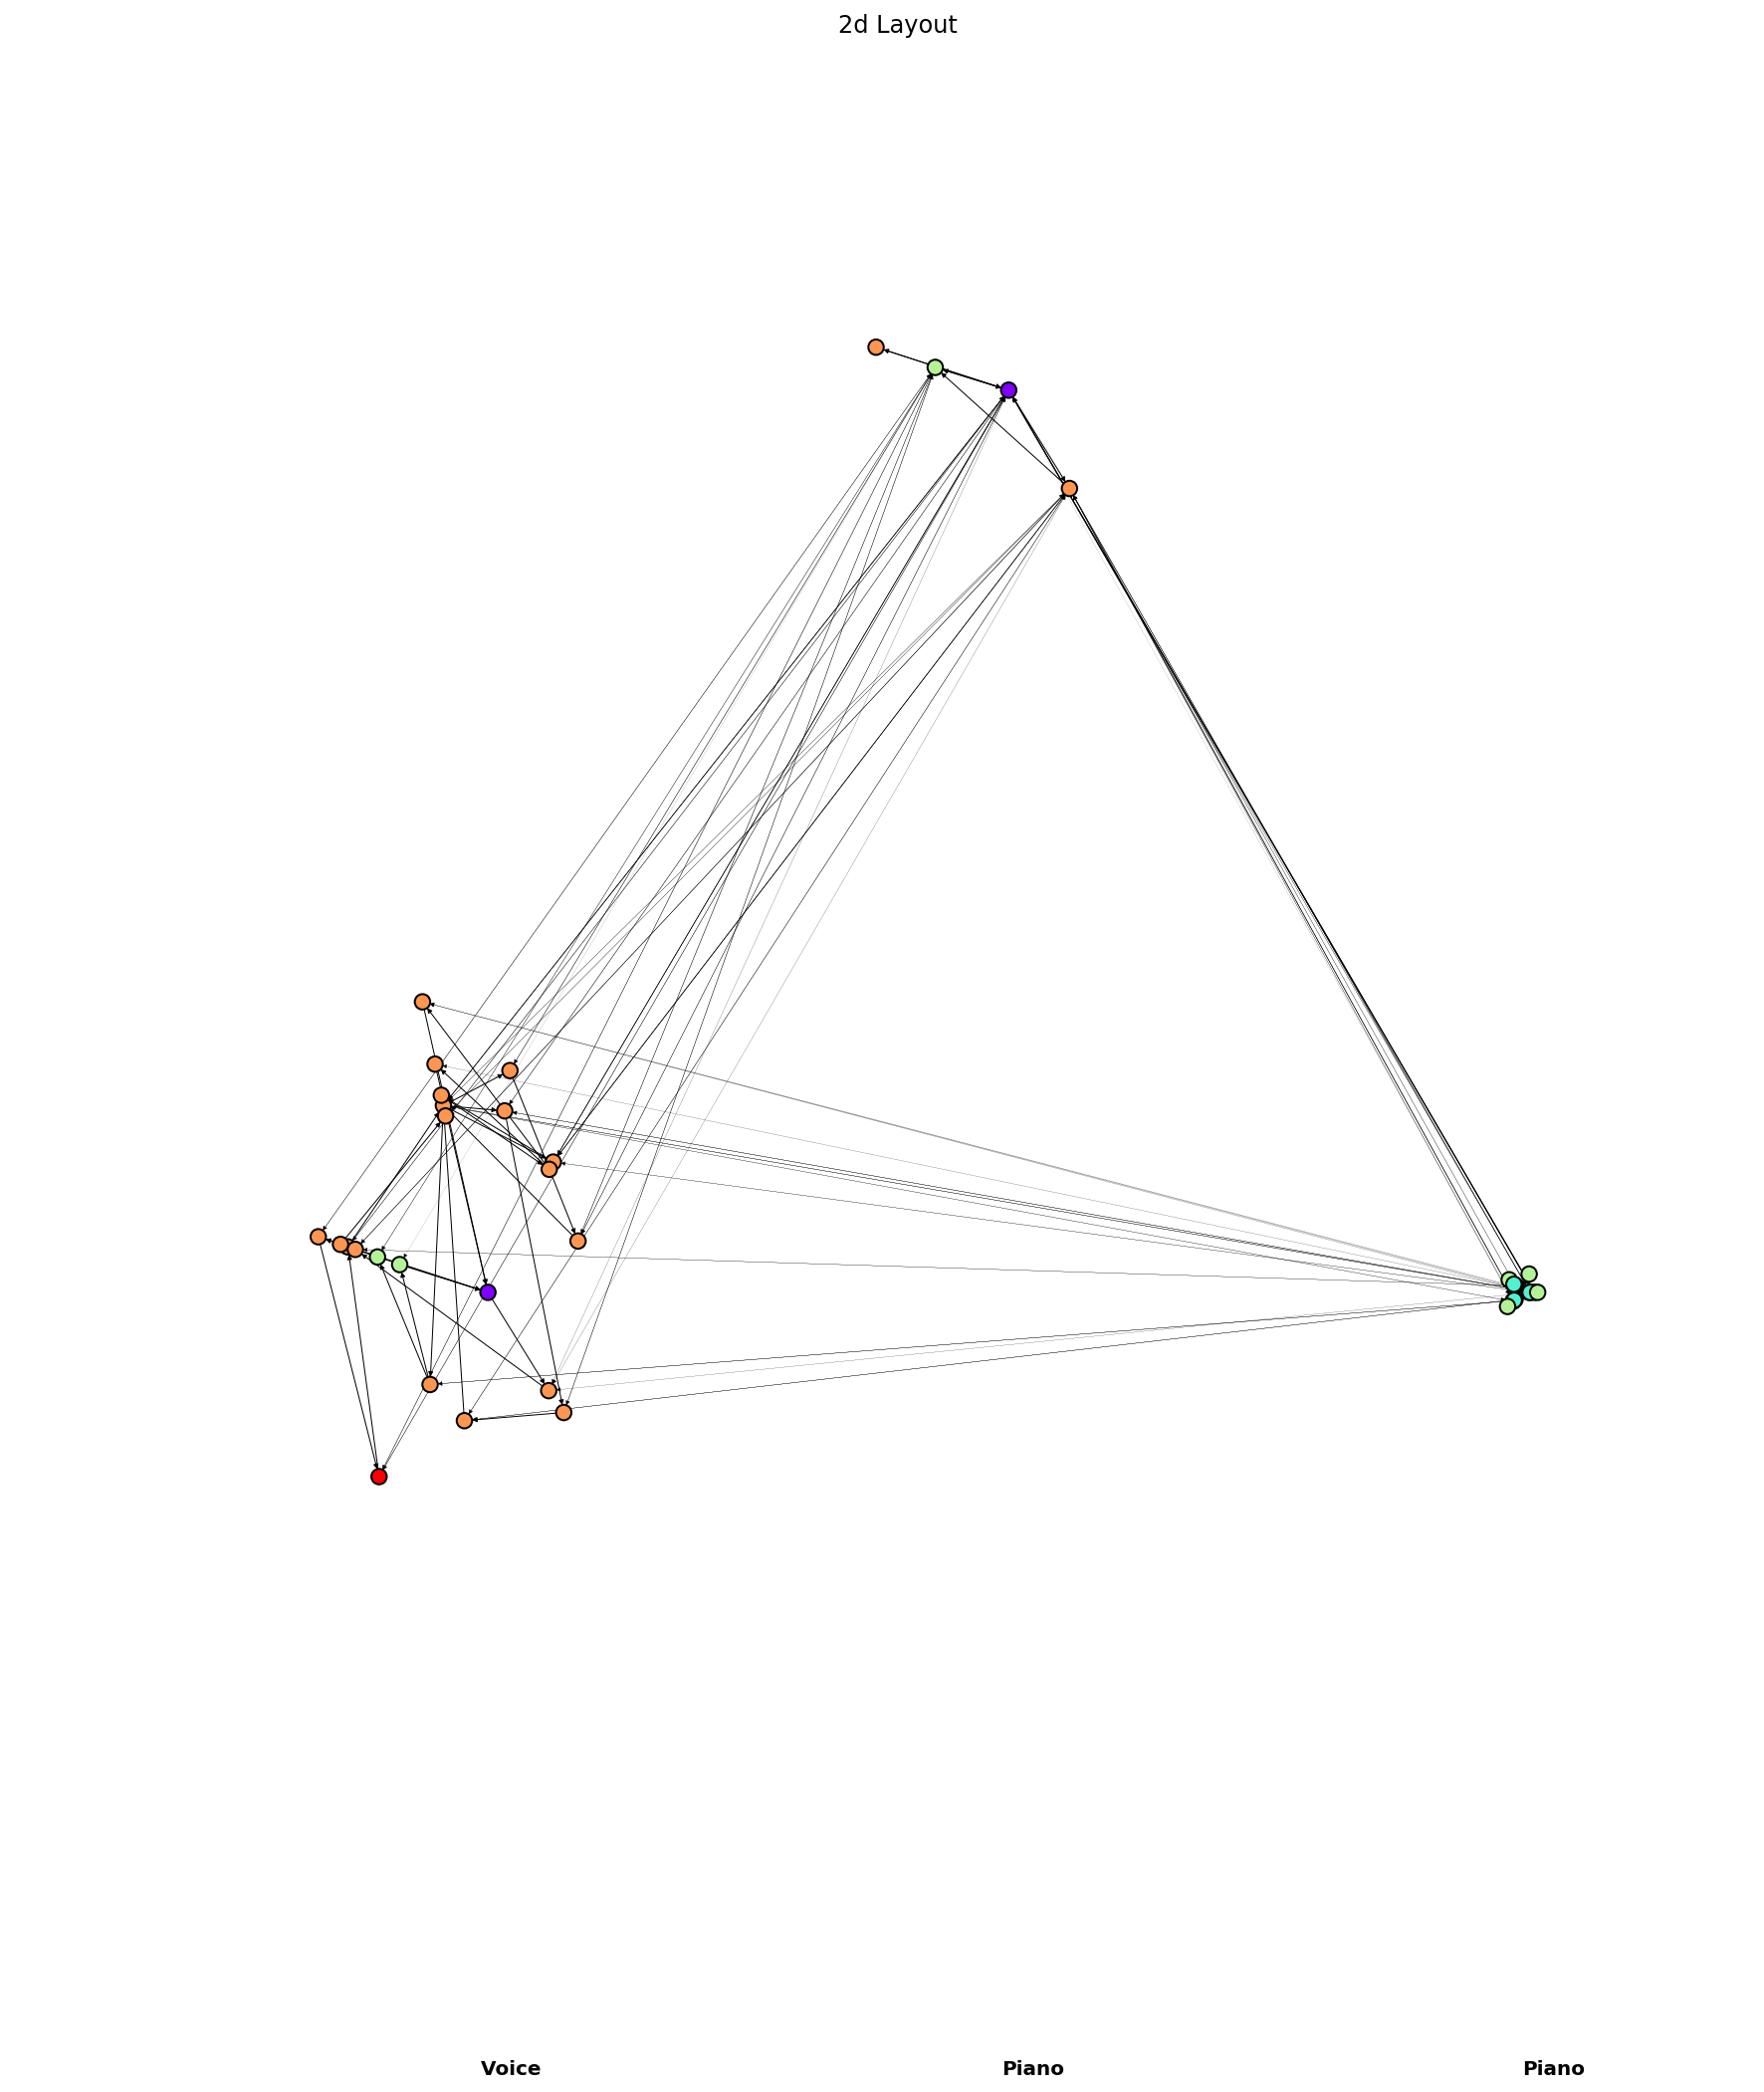

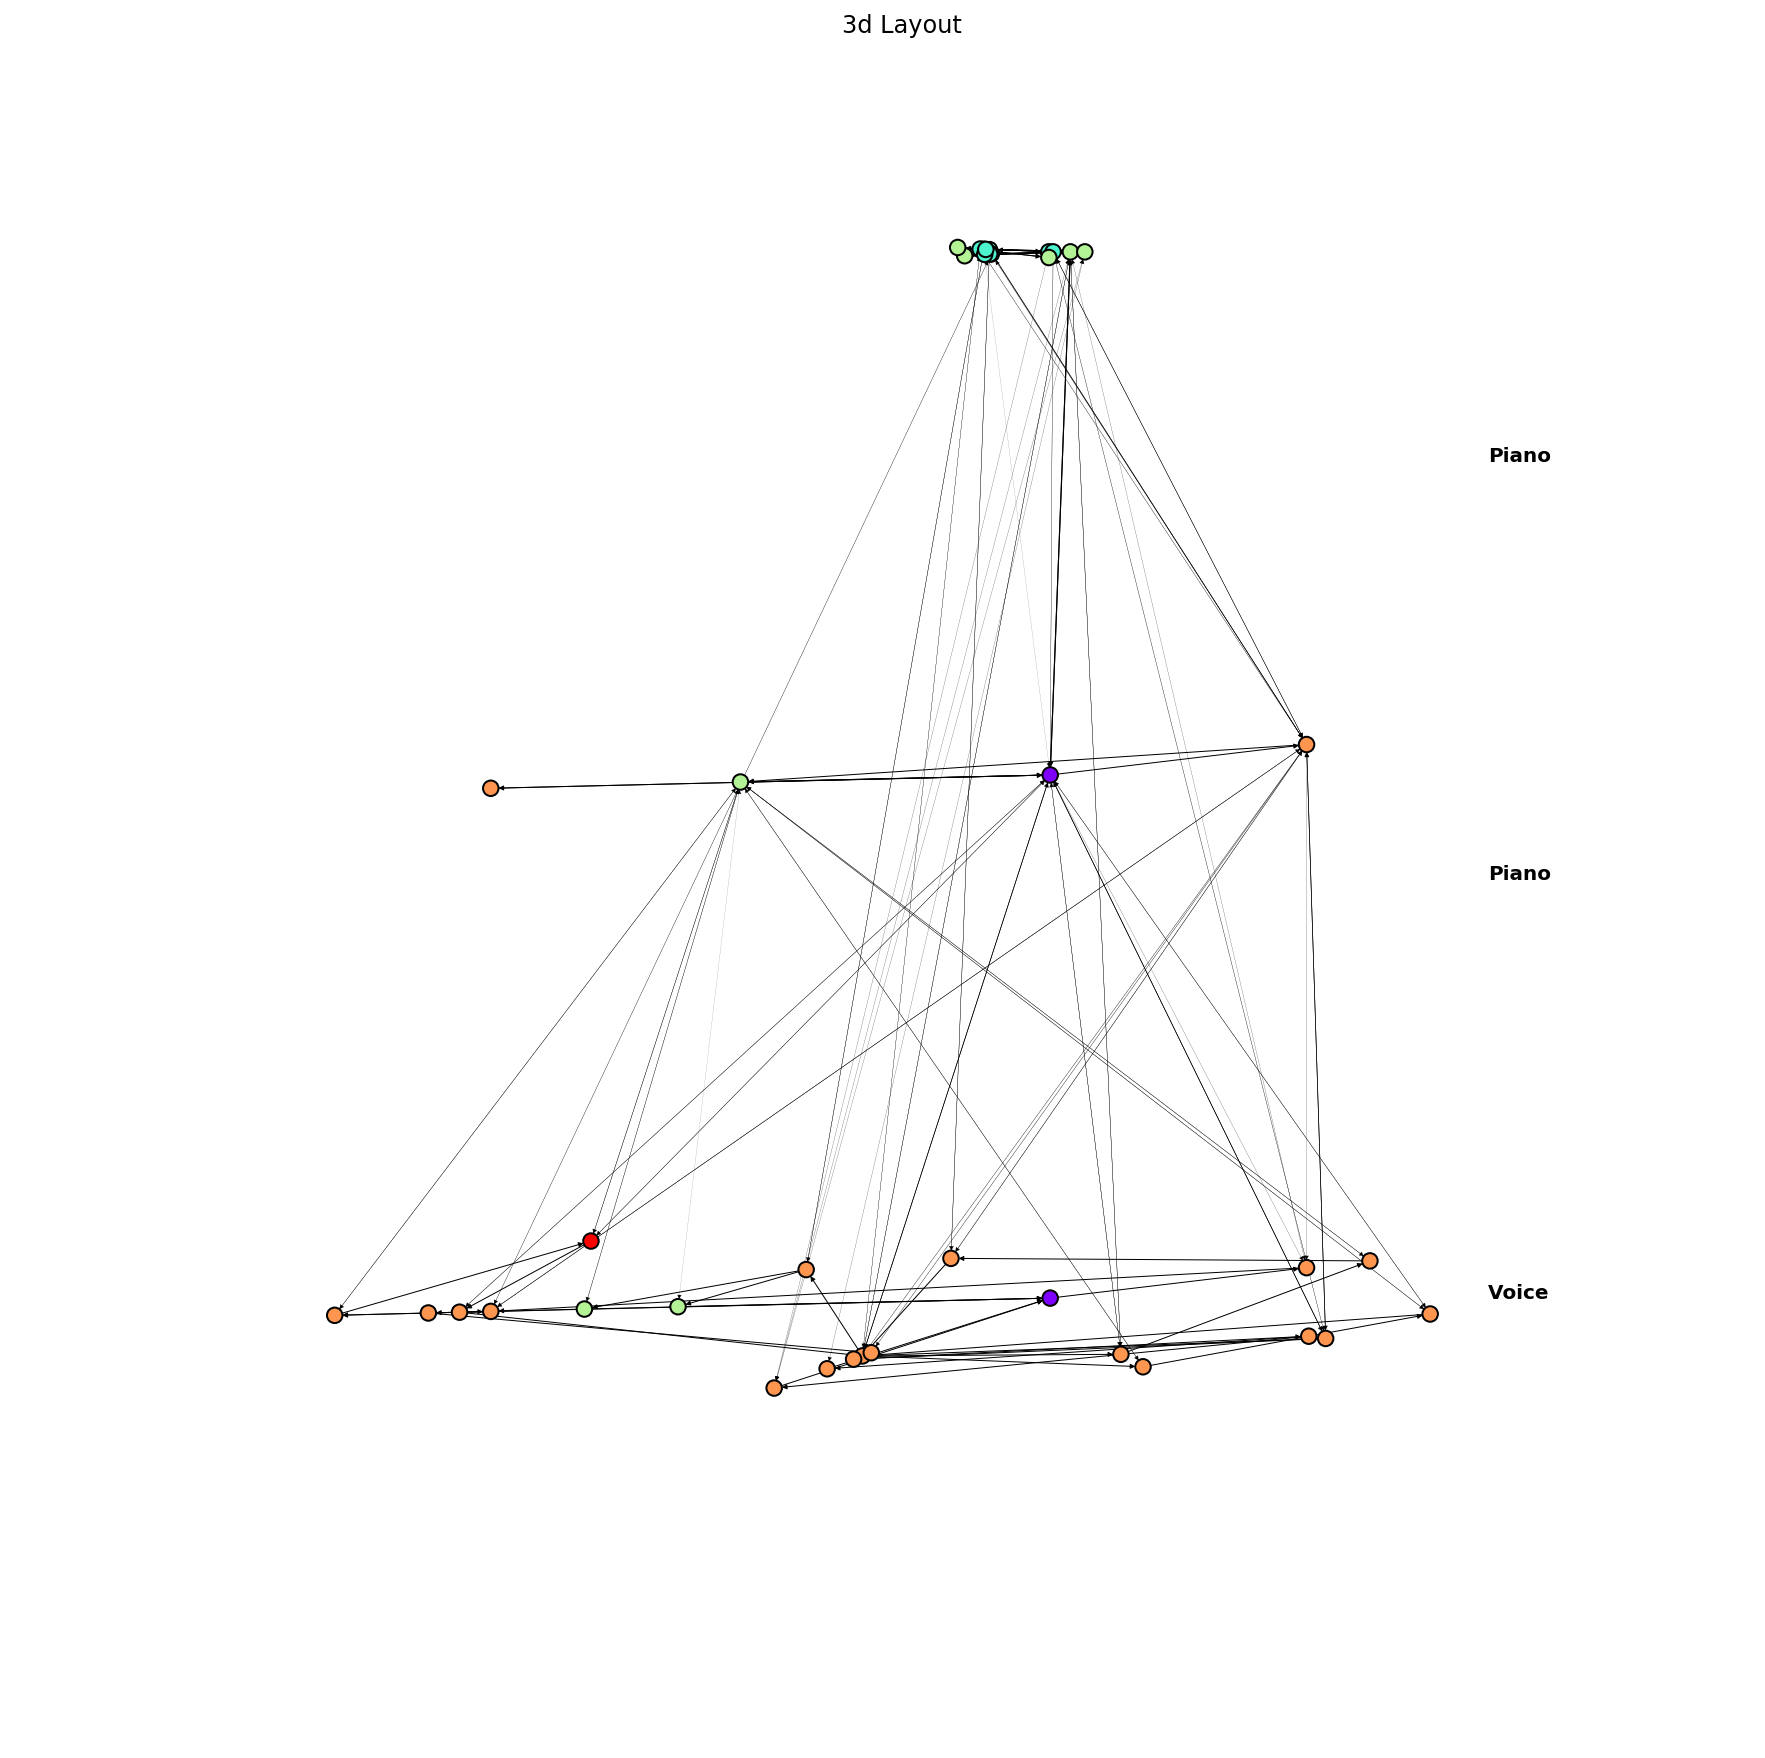

In [4]:
cancion = r'./partituras/Rock/Beatles/beatles_wood.mxl'
f_graficar_2dy3d(cancion,[0,1,2])